In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import time

In [3]:
data= pd.read_csv("england-pl-players-2018-to-2019-stats.csv")
data

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,...,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,...,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,...,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,...,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,...,1.30,69,35,0,0,0.00,-1,-1,-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Youri Tielemans,23,862963200,1997/05/07,Premier League,2018/2019,Midfielder,Leicester City,1092,575,...,1.07,84,84,546,273,0.16,80,13,-1,4
568,Yves Bissouma,24,841363200,1996/08/30,Premier League,2018/2019,Midfielder,Brighton & Hove Albion,1769,747,...,1.53,59,63,354,0,0.25,402,293,-1,17
569,Zechariah Medley,20,962928000,2000/07/07,Premier League,2018/2019,Defender,Arsenal,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1
570,Zeze Steven Sessegnon,20,958608000,2000/05/18,Premier League,2018/2019,Defender,Fulham,0,0,...,0.00,0,0,0,0,0.00,-1,-1,-1,-1


In [4]:
data.columns

Index(['full_name', 'age', 'birthday', 'birthday_GMT', 'league', 'season',
       'position', 'Current Club', 'minutes_played_overall',
       'minutes_played_home', 'minutes_played_away', 'nationality',
       'appearances_overall', 'appearances_home', 'appearances_away',
       'goals_overall', 'goals_home', 'goals_away', 'assists_overall',
       'assists_home', 'assists_away', 'penalty_goals', 'penalty_misses',
       'clean_sheets_overall', 'clean_sheets_home', 'clean_sheets_away',
       'conceded_overall', 'conceded_home', 'conceded_away',
       'yellow_cards_overall', 'red_cards_overall',
       'goals_involved_per_90_overall', 'assists_per_90_overall',
       'goals_per_90_overall', 'goals_per_90_home', 'goals_per_90_away',
       'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
       'min_per_assist_overall', 'cards_per_90_overall',
       'rank_in_league_top_attackers', 'rank_in_league_top_midfie

In [5]:
data.shape

(572, 47)

In [6]:
def is_unique(s):
    a = s.to_numpy() 
    return (a[0] == a).all()

is_unique(data['league'])
is_unique(data['season'])

True

In [7]:
df=data.drop(["age", "birthday", "birthday_GMT", "nationality", "rank_in_league_top_attackers", "rank_in_league_top_defenders", "rank_in_league_top_midfielders", "league", "season"], axis=1)

In [8]:
df.columns

Index(['full_name', 'position', 'Current Club', 'minutes_played_overall',
       'minutes_played_home', 'minutes_played_away', 'appearances_overall',
       'appearances_home', 'appearances_away', 'goals_overall', 'goals_home',
       'goals_away', 'assists_overall', 'assists_home', 'assists_away',
       'penalty_goals', 'penalty_misses', 'clean_sheets_overall',
       'clean_sheets_home', 'clean_sheets_away', 'conceded_overall',
       'conceded_home', 'conceded_away', 'yellow_cards_overall',
       'red_cards_overall', 'goals_involved_per_90_overall',
       'assists_per_90_overall', 'goals_per_90_overall', 'goals_per_90_home',
       'goals_per_90_away', 'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
       'min_per_assist_overall', 'cards_per_90_overall',
       'rank_in_club_top_scorer'],
      dtype='object')

In [9]:
df.head()

,full_name,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,appearances_overall,appearances_home,appearances_away,goals_overall,...,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_club_top_scorer
0,Aaron Cresswell,Defender,West Ham United,1589,888,701,20,11,9,0,...,0.00,0.00,0,1.25,72,79,1589,1589,0.06,20
1,Aaron Lennon,Midfielder,Burnley,1217,487,730,16,7,9,1,...,0.18,0.00,1217,1.48,61,76,1217,1217,0.07,10
2,Aaron Mooy,Midfielder,Huddersfield Town,2327,1190,1137,29,15,14,3,...,0.08,0.16,776,1.78,51,80,582,2327,0.15,3
3,Aaron Ramsey,Midfielder,Arsenal,1327,689,638,28,14,14,4,...,0.26,0.28,332,0.81,111,47,0,221,0.00,5
4,Aaron Rowe,Forward,Huddersfield Town,69,14,55,2,1,1,0,...,0.00,0.00,0,1.30,69,35,0,0,0.00,31


In [58]:
#Calculate points per team 
def pointsPerTeam(team):
    teampoints = 0
    for player in team:
        teampoints = teampoints + pointsPerPlayer(player)
        
    return teampoints    

#Calculate total points per player
def pointsPerPlayer(index):
    
    global pos 
    pos = getPosition(index)
    points = goalPoints(index)
    points = points + assistPoints(index)
    points = points + cleanSheetsPoints(index)
    points = points + cardPoints(index)
    points = points + concededPoints(index)
    points = points + penaltyMissedPoints(index) 
    points = points + pointsForPlaying(index)
    return points

# Get values from different actions
def getPosition(index):
    
#     pos = df['position'].values[index]
#     return pos
    return df['position'].values[index]

def getGoals(index): 
    
#     goals = df['goals_overall'].values[index]
#     return goals
    return df['goals_overall'].values[index]

def getAssists(index):
    
#     assists = df['assists_overall'].values[index]
#     return assists
    return df['assists_overall'].values[index]

def getCleanSheets(index):
    
#     cs = df['clean_sheets_overall'].values[index]
#     return cs
    return df['clean_sheets_overall'].values[index]

def getRedCards(index):

#     rc = df['red_cards_overall'].values[index] 
#     return rc
    return df['red_cards_overall'].values[index]

def getYellowCards(index):

    #yc = df['yellow_cards_overall'].values[index] 
    #return yc
    return df['yellow_cards_overall'].values[index] 

def getConcededGoals(index):
    
#     conceded = df['conceded_overall'].values[index] 
#     return conceded
    return df['conceded_overall'].values[index]

def getPenaltyMissed(index):
    
    #pmiss = df['penalty_misses'].values[index]
    #return pmiss
    return df['penalty_misses'].values[index]

def getGamesPlayed(index):
    
    #games = df['appearances_overall'].values[index]
    #return games
    return df['appearances_overall'].values[index]
    
# Calculate different points from actions 
def goalPoints(index):
    
    goals = getGoals(index)
    
    if pos == "Midfielder":
        points = goals*5
    
    elif pos == "Forward":
        points = goals*4
    
    else:
        points = goals*6
    
    return points

def assistPoints(index):

    #assists = getAssists(index)
    #points = assists*3
    #return points
    return 3*getAssists(index)

def cleanSheetsPoints(index):
    
    points = 0
    cs = getCleanSheets(index)
    #pos = getPosition(index)
    
    if pos == "Defender" or pos == "Goalkeeper":
        points = cs*4
        
    elif pos == "Midfielder": 
        points = cs*1
    
    return points

def cardPoints(index):

#     rc = getRedCards(index)
#     yc = getYellowCards(index)
    
#     points = -3*rc - yc
    
#     return points

    return -3*getRedCards(index) - getYellowCards(index)

def concededPoints(index):
    
    pos = getPosition(index)
    
    if pos == "Defender" or pos == "Goalkeeper": 
        
        conceded = getConcededGoals(index) 
        
        if conceded%2 == 0: 
            return -conceded/2
        else:
            return (conceded-1)/2
        
    else:
        return 0

def penaltyMissedPoints(index):
    
    #points = -2 * getPenaltyMissed(index)
    #return points
    return -2 * getPenaltyMissed(index)
#Have not implemented if they played more than 60 min. Only implemented that they get 1 point every game they played.
def pointsForPlaying(index):
    
#     points = getGamesPlayed(index)
#     return points
    return getGamesPlayed(index)
    
    
##### Remaining points

# points per saved shot (can't with these stats)

# points per penalty saved (can't with these stats)

# bonus points (can't per game)

# own goal (can't with these stats) 

In [11]:
pointsPerPlayer(2)

47

In [12]:
team = np.arange(11)
pointsPerTeam(team)

337.0

In [15]:
team = np.random.randint(df.shape[0], size=11)
pointsPerTeam(team)

341.0

In [14]:
start_time = time.time()

testindexes = range(30)
teams = list(itertools.combinations(testindexes, 11))

print("--- %s seconds ---" % (time.time() - start_time))
print(teams[0])
print(len(teams))

--- 14.496031522750854 seconds ---
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
54627300


In [17]:
def nump2(n, k):
    a = np.ones((k, n-k+1), dtype=int)
    a[0] = np.arange(n-k+1)
    for j in range(1, k):
        reps = (n-k+j) - a[j-1]
        a = np.repeat(a, reps, axis=1)
        ind = np.add.accumulate(reps)
        a[j, ind[:-1]] = 1-reps[1:]
        a[j, 0] = j
        a[j] = np.add.accumulate(a[j])
    return a

In [53]:
start_time = time.time()

teams2 = np.transpose(nump2(17,11))

print("--- %s seconds ---" % (time.time() - start_time))
#print(teams2)
print(len(teams2))

--- 0.004989147186279297 seconds ---
12376


In [59]:
pointsList=[]
i=0
start_time = time.time()

for team in teams2:
    
    pointsList.append(pointsPerTeam(team))
#     i+=1
#     if i % 10000 ==0:
#         print(i/10000)
print("--- %s seconds ---" % (time.time() - start_time))


index_max = np.argmax(pointsList)

print(index_max)
print(pointsList[index_max])
print(teams[index_max])

--- 5.207321405410767 seconds ---
1299
499.0
(0, 1, 2, 3, 4, 5, 6, 7, 17, 23, 24)


Defender
Midfielder
Midfielder
Midfielder
Forward
Midfielder
Midfielder
Midfielder
Goalkeeper
Goalkeeper
Midfielder


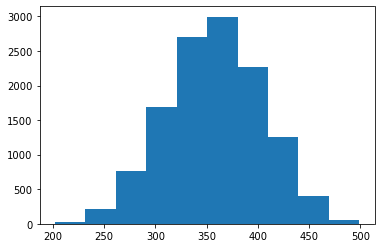

In [62]:
plt.hist(pointsList)
for i in teams[index_max]:
    print(getPosition(i))

In [86]:
pointsPerPlayer(411)

149